In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948348e+07,1.948348e+07,False,NaN,1,NaN,NaN,None,2023-09-12T17:29:00.000Z,26027.200892,1.857468e+10,29.8740,-1.031413,3.570585,1.146030,-11.437409,-15.932235,0.352776,5.071005e+11,49.1155,5.465712e+11,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202217e+08,1.202217e+08,True,NaN,2,NaN,NaN,None,2023-09-12T17:29:00.000Z,1593.519653,7.380789e+09,0.2482,-0.977763,2.342823,-2.495387,-13.847490,-19.109297,-8.155432,1.915757e+11,18.5560,1.915757e+11,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
2,825,Tether USDt,USDT,tether,61930,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.302599e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.999936,2.704767e+10,13.1117,0.001698,0.025272,0.050759,0.062287,-0.078356,0.023630,8.302070e+10,8.0414,8.543176e+10,None,2023-09-12T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-12 17:31:10.118860+00:00
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538490e+08,1.538490e+08,False,NaN,4,NaN,NaN,None,2023-09-12T17:29:00.000Z,211.421824,4.529847e+08,2.7581,-0.652905,2.572564,-1.599383,-12.121252,-16.300844,-14.027286,3.252703e+10,3.1506,3.252703e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
4,3408,USD Coin,USDC,usd-coin,14059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.604631e+10,2.604631e+10,False,NaN,5,NaN,NaN,None,2023-09-12T17:29:00.000Z,1.000009,4.598128e+09,28.3515,-0.009107,-0.029377,-0.002654,0.001403,-0.034072,0.003077,2.604656e+10,2.5229,2.604656e+10,None,2023-09-12T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-12 17:31:10.118860+00:00
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.480636,1.059047e+09,-11.8852,-0.675240,2.205433,-4.198488,-23.550909,-34.171269,-4.151612,2.551362e+10,2.4712,4.806359e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509820e+10,3.615266e+10,False,NaN,7,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.247440,1.283965e+08,-6.1810,-0.817326,2.643758,-3.616982,-15.191740,-26.366156,-9.161144,8.684687e+09,0.8413,1.113478e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409789e+11,1.409789e+11,True,NaN,8,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.061240,2.473235e+08,-3.4923,-0.732483,2.086637,-4.131124,-19.254287,-13.468221,-0.897452,8.633544e+09,0.8362,8.633544e+09,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:10.118860+00:00
8,5426,Solana,SOL,solana,506,2020-04-10T00:00:00.000Z

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile(r'D:\Desktop\PRASHANTH\MTECH 3RD SEM\Python\API.csv'):
        df.to_csv(r'D:\Desktop\PRASHANTH\MTECH 3RD SEM\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Desktop\PRASHANTH\MTECH 3RD SEM\Python\API.csv', mode='a', header=False)

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [7]:
df72 = pd.read_csv(r'D:\Desktop\PRASHANTH\MTECH 3RD SEM\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948348e+07,1.948348e+07,False,NaN,1,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,26188.490485,1.821903e+10,26.8060,-0.024345,4.026041,1.728457,-10.724248,-16.207693,0.873272,5.102430e+11,49.0796,5.499583e+11,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
1,1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202217e+08,1.202217e+08,True,NaN,2,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,1603.554611,7.436445e+09,-2.9802,-0.000400,2.761396,-2.024107,-13.106461,-19.569945,-7.766606,1.927821e+11,18.5614,1.927821e+11,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
2,2,825,Tether USDt,USDT,tether,61930,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.302599e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,0.999926,2.678780e+10,10.4679,-0.002848,0.026590,0.038573,0.048523,-0.050572,0.022046,8.301982e+10,7.9933,8.543085e+10,NaN,2023-09-12T16:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-12 16:54:42.630925+00:00
3,3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538490e+08,1.538490e+08,False,NaN,4,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,212.589182,4.491412e+08,-0.8199,-0.003637,2.921619,-1.267540,-11.579357,-16.780378,-14.074588,3.270663e+10,3.1490,3.270663e+10,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
4,4,3408,USD Coin,USDC,usd-coin,14059,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.604631e+10,2.604631e+10,False,NaN,5,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,1.000184,4.516433e+09,25.1290,0.007253,0.008189,0.005620,0.003942,0.004279,0.030675,2.605112e+10,2.5047,2.605112e+10,NaN,2023-09-12T16:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-12 16:54:42.630925+00:00
5,5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,0.483348,1.056997e+09,-11.9939,0.313267,2.488029,-3.896153,-23.052552,-35.564071,-3.800447,2.565759e+10,2.4704,4.833480e+10,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
6,6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.509820e+10,3.615266e+10,False,NaN,7,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,0.249090,1.280047e+08,-7.9180,0.130927,3.022810,-3.311013,-14.414777,-27.026683,-8.784029,8.742617e+09,0.8407,1.120906e+10,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
7,7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.409789e+11,1.409789e+11,True,NaN,8,NaN,NaN,NaN,2023-09-12T16:51:00.000Z,0.061620,2.454840e+08,-5.3348,0.141780,2.390605,-3.811484,-18.633626,-14.104343,-0.500083,8.687103e+09,0.8364,8.687103e+09,NaN,2023-09-12T16:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 16:54:42.630925+00:00
8,8,5426,Solana,SOL,solana,506,2020-04-10T00:0

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948348e+07,1.948348e+07,False,NaN,1,NaN,NaN,None,2023-09-12T17:29:00.000Z,26027.200892,1.857468e+10,29.8740,-1.031413,3.570585,1.146030,-11.437409,-15.932235,0.352776,5.071005e+11,49.1155,5.465712e+11,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202217e+08,1.202217e+08,True,NaN,2,NaN,NaN,None,2023-09-12T17:29:00.000Z,1593.519653,7.380789e+09,0.2482,-0.977763,2.342823,-2.495387,-13.847490,-19.109297,-8.155432,1.915757e+11,18.5560,1.915757e+11,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
2,825,Tether USDt,USDT,tether,61930,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.302599e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.999936,2.704767e+10,13.1117,0.001698,0.025272,0.050759,0.062287,-0.078356,0.023630,8.302070e+10,8.0414,8.543176e+10,None,2023-09-12T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-12 17:31:11.303080+00:00
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538490e+08,1.538490e+08,False,NaN,4,NaN,NaN,None,2023-09-12T17:29:00.000Z,211.421824,4.529847e+08,2.7581,-0.652905,2.572564,-1.599383,-12.121252,-16.300844,-14.027286,3.252703e+10,3.1506,3.252703e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
4,3408,USD Coin,USDC,usd-coin,14059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.604631e+10,2.604631e+10,False,NaN,5,NaN,NaN,None,2023-09-12T17:29:00.000Z,1.000009,4.598128e+09,28.3515,-0.009107,-0.029377,-0.002654,0.001403,-0.034072,0.003077,2.604656e+10,2.5229,2.604656e+10,None,2023-09-12T17:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-12 17:31:11.303080+00:00
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.480636,1.059047e+09,-11.8852,-0.675240,2.205433,-4.198488,-23.550909,-34.171269,-4.151612,2.551362e+10,2.4712,4.806359e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509820e+10,3.615266e+10,False,NaN,7,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.247440,1.283965e+08,-6.1810,-0.817326,2.643758,-3.616982,-15.191740,-26.366156,-9.161144,8.684687e+09,0.8413,1.113478e+10,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409789e+11,1.409789e+11,True,NaN,8,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.061240,2.473235e+08,-3.4923,-0.732483,2.086637,-4.131124,-19.254287,-13.468221,-0.897452,8.633544e+09,0.8362,8.633544e+09,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
8,5426,Solana,SOL,solana,506,2020-04-10T00:00:00.000Z

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19483481.00000,19483481.00000,False,NaN,1,NaN,NaN,None,2023-09-12T17:29:00.000Z,26027.20089,18574680507.72620,29.87400,-1.03141,3.57058,1.14603,-11.43741,-15.93223,0.35278,507100474059.06287,49.11550,546571218728.33002,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120221729.26114,120221729.26114,True,NaN,2,NaN,NaN,None,2023-09-12T17:29:00.000Z,1593.51965,7380788675.09118,0.24820,-0.97776,2.34282,-2.49539,-13.84749,-19.10930,-8.15543,191575688240.23975,18.55600,191575688240.23999,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
2,825,Tether USDt,USDT,tether,61930,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83025993200.77003,85437198727.24951,True,NaN,3,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.99994,27047670006.17354,13.11170,0.00170,0.02527,0.05076,0.06229,-0.07836,0.02363,83020704237.04137,8.04140,85431756163.69000,None,2023-09-12T17:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-12 17:31:11.303080+00:00
3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153848967.72633,153848967.72633,False,NaN,4,NaN,NaN,None,2023-09-12T17:29:00.000Z,211.42182,452984689.12258,2.75810,-0.65291,2.57256,-1.59938,-12.12125,-16.30084,-14.02729,32527029426.11279,3.15060,32527029426.11000,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
4,3408,USD Coin,USDC,usd-coin,14059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26046311718.38616,26046311718.38616,False,NaN,5,NaN,NaN,None,2023-09-12T17:29:00.000Z,1.00001,4598128437.55595,28.35150,-0.00911,-0.02938,-0.00265,0.00140,-0.03407,0.00308,26046556101.15163,2.52290,26046556101.15000,None,2023-09-12T17:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-12 17:31:11.303080+00:00
5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53083046512.00000,99988441546.00000,False,NaN,6,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.48064,1059046979.74848,-11.88520,-0.67524,2.20543,-4.19849,-23.55091,-34.17127,-4.15161,25513615268.87196,2.47120,48063585165.75000,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35098203985.02600,36152657252.52400,False,NaN,7,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.24744,128396488.84862,-6.18100,-0.81733,2.64376,-3.61698,-15.19174,-26.36616,-9.16114,8684686521.53859,0.84130,11134783239.51000,None,2023-09-12T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-12 17:31:11.303080+00:00
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140978856383.70523,140978856383.70523,True,NaN,8,NaN,NaN,None,2023-09-12T17:29:00.000Z,0.06124,247323474.85764,-3.49230,-0.73248,2.08664,-4.13112,-19.25429,-13.46822,-0.89745,8633543805.14438,

In [11]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.03141,3.57058,1.14603,-11.43741,-15.93223,0.35278
Ethereum,-0.97776,2.34282,-2.49539,-13.84749,-19.10930,-8.15543
Tether USDt,0.00170,0.02527,0.05076,0.06229,-0.07836,0.02363
BNB,-0.65291,2.57256,-1.59938,-12.12125,-16.30084,-14.02729
USD Coin,-0.00911,-0.02938,-0.00265,0.00140,-0.03407,0.00308
XRP,-0.67524,2.20543,-4.19849,-23.55091,-34.17127,-4.15161
Cardano,-0.81733,2.64376,-3.61698,-15.19174,-26.36616,-9.16114
Dogecoin,-0.73248,2.08664,-4.13112,-19.25429,-13.46822,-0.89745
Solana,-1.36397,1.22296,-11.86420,-27.21031,-34.47838,17.90134


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.03141
             quote.USD.percent_change_24h     3.57058
             quote.USD.percent_change_7d      1.14603
             quote.USD.percent_change_30d   -11.43741
             quote.USD.percent_change_60d   -15.93223
             quote.USD.percent_change_90d     0.35278
Ethereum     quote.USD.percent_change_1h     -0.97776
             quote.USD.percent_change_24h     2.34282
             quote.USD.percent_change_7d     -2.49539
             quote.USD.percent_change_30d   -13.84749
             quote.USD.percent_change_60d   -19.10930
             quote.USD.percent_change_90d    -8.15543
Tether USDt  quote.USD.percent_change_1h      0.00170
             quote.USD.percent_change_24h     0.02527
             quote.USD.percent_change_7d      0.05076
             quote.USD.percent_change_30d     0.06229
             quote.USD.percent_change_60d    -0.07836
             quote.USD.percent_change_90

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.03141
            quote.USD.percent_change_24h   3.57058
            quote.USD.percent_change_7d    1.14603
            quote.USD.percent_change_30d -11.43741
            quote.USD.percent_change_60d -15.93223
            quote.USD.percent_change_90d   0.35278
Ethereum    quote.USD.percent_change_1h   -0.97776
            quote.USD.percent_change_24h   2.34282
            quote.USD.percent_change_7d   -2.49539
            quote.USD.percent_change_30d -13.84749
            quote.USD.percent_change_60d -19.10930
            quote.USD.percent_change_90d  -8.15543
Tether USDt quote.USD.percent_change_1h    0.00170
            quote.USD.percent_change_24h   0.02527
            quote.USD.percent_change_7d    0.05076
            quote.USD.percent_change_30d   0.06229
            quote.USD.percent_change_60d  -0.07836
            quote.USD.percent_change_90d   0.02363
BNB         quote.USD.percent_change_1h   -0.65291
            quote.USD.percent_change_24h   2.57256
            quote.USD.percent_change_7d   -1.59938
            quote.USD.percent_change_30d -12.12125
            quote.USD.percent_change_60d -16.30084
            quote.USD.percent_change_90d -14.02729
USD Coin    quote.USD.percent_change_1h   -0.00911
            quote.USD.percent_change_24h  -0.02938
            quote.USD.percent_change_7d   -0.00265
            quote.USD.percent_change_30d   0.00140
            quote.USD.percent_change_60d  -0.03407
            quote.USD.percent_change_90d   0.00308
XRP         quote.USD.percent_change_1h   -0.67524
            quote.USD.percent_change_24h   2.20543
            quote.USD.percent_change_7d   -4.19849
            quote.USD.percent_change_30d -23.55091
            quote.USD.percent_change_60d -34.17127
            quote.USD.percent_change_90d  -4.15161
Cardano     quote.USD.percent_change_1h   -0.81733
            quote.USD.percent_change_24h   2.64376
            quote.USD.percent_change_7d   -3.61698
            quote.USD.percent_change_30d -15.19174
            quote.USD.percent_change_60d -26.36616
            quote.USD.percent_change_90d  -9.16114
Dogecoin    quote.USD.percent_change_1h   -0.73248
            quote.USD.percent_change_24h   2.08664
            quote.USD.percent_change_7d   -4.13112
            quote.USD.percent_change_30d -19.25429
            quote.USD.percent_change_60d -13.46822
            quote.USD.percent_change_90d  -0.89745
Solana      quote.USD.percent_change_1h   -1.36397
            quote.USD.percent_change_24h   1.22296
            quote.USD.percent_change_7d  -11.86420
            quote.USD.percent_change_30d -27.21031
            quote.USD.percent_change_60d -34.47838
            quote.USD.percent_change_90d  17.90134
TRON        quote.USD.percent_change_1h   -0.44010
            quote.USD.percent_change_24h   5.20306
            quote.USD.percent_change_7d    5.42773
            quote.USD.percent_change_30d   5.17372
            quote.USD.percent_change_60d   1.17009
            quote.USD.percent_change_90d  12.45048
Toncoin     quote.USD.percent_change_1h    1.72893
            quote.USD.percent_change_24h  10.75081
            quote.USD.percent_change_7d    0.36481
            quote.USD.percent_change_30d  26.37168
            quote.USD.percent_change_60d  32.36465
            quote.USD.percent_change_90d  20.65668
Dai         quote.USD.percent_change_1h   -0.06439
            quote.USD.percent_change_24h   0.04920
            quote.USD.percent_change_7d    0.00947
            quote.USD.percent_change_30d  -0.00794
            quote.USD.percent_change_60d   0.11981
            quote.USD.percent_change_90d   0.03062
Polkadot    quote.USD.percent_change_1h   -0.80515
            quote.USD.percent_change_24h  -0.33550
            quote.USD.percent_change_7d   -6.16889
            quote.USD.percent_change_30d -20.46072
            quote.USD.percent_change_60d -28.12658
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

,values
0,-1.03141
1,3.57058
2,1.14603
3,-11.43741
4,-15.93223
5,0.35278
6,-0.97776
7,2.34282
8,-2.49539
9,-13.84749


In [17]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,values
0,-1.03141
1,3.57058
2,1.14603
3,-11.43741
4,-15.93223
5,0.35278
6,-0.97776
7,2.34282
8,-2.49539
9,-13.84749


In [18]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

KeyError: 'percent_change'

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

ValueError: Could not interpret input 'percent_change'

In [21]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26027.20089,2023-09-12 17:31:11.303080+00:00
15,Bitcoin,26027.20089,NaT


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

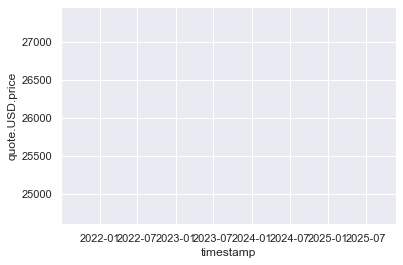

In [22]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)